# Import data


In [1]:
import numpy as np

input_data_matrix_1 = np.loadtxt('./2_12_0_0.txt', delimiter = ',')

print(input_data_matrix_1)

[[9.0000000e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.5000000e-05 4.0000000e-06 0.0000000e+00 0.0000000e+00]
 [8.0000000e-05 2.6000000e-05 0.0000000e+00 0.0000000e+00]
 ...
 [5.6754082e+01 0.0000000e+00 1.0860000e-03 2.5300000e+02]
 [5.6754093e+01 0.0000000e+00 1.0860000e-03 2.5300000e+02]
 [5.6754105e+01 0.0000000e+00 1.0850000e-03 2.5300000e+02]]


# 1. Creating parameters matrix

| Time | Force | Position | Velocity1 | Acceleration | Velocity2 | Stiffness |  
| ---- | ----- | -------- | --------- | ------------ | --------- | --------- |
| 0 | 1 | 2 | 3 | 4 | 5 | 6 |

In [2]:
rows_input_data_matrix_1 = input_data_matrix_1.shape[0]
column_input_data_matrix_1 = input_data_matrix_1.shape[1]

print("Rows:",rows_input_data_matrix_1)
print("Column:", column_input_data_matrix_1)

#create features matrix
nos_of_features = 10

features_matrix_1 = np.zeros((rows_input_data_matrix_1, nos_of_features))

print(features_matrix_1)

Rows: 5200000
Column: 4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 2. Adding parameters

In [3]:
features_matrix_1[:,0] = input_data_matrix_1[:,0]         # time in s
features_matrix_1[:,1] = input_data_matrix_1[:,1]         # Force in N
features_matrix_1[:,2] = input_data_matrix_1[:,2]         # Force Feedback in N
features_matrix_1[:,3] = input_data_matrix_1[:,3]*0.005   # Position in mm 

In [5]:
print(features_matrix_1)

[[9.0000000e-06 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [6.5000000e-05 4.0000000e-06 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.0000000e-05 2.6000000e-05 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [5.6754082e+01 0.0000000e+00 1.0860000e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.6754093e+01 0.0000000e+00 1.0860000e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.6754105e+01 0.0000000e+00 1.0850000e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


# 3. Velocity calculation - Filter Method 
---
use a filters to calculate the velocity

$$
{\frac{sg}{s+g}}
\tag{2}
$$

by calculating

$$
Y_n = g[X_n - {\frac{Y_{n-1}}{s}}]
\tag{3}
$$

in the program

|Symbol|Discription|
|:------------:|:--------------:|
|$$s$$|Laplas operator|
|$$g$$|Filter constent|
|$$X_n$$|$$n^{th}$$ operetion positon input|
|$$Y_n$$|$$n^{th}$$ operation velocity output|

In [4]:
g = 3
x = 0
velocity_sum = 0
for x in range (rows_input_data_matrix_1 - 1):
    time_deff = features_matrix_1[(x+1),0] - features_matrix_1[x,0]
    velocity_sum = velocity_sum + features_matrix_1[x,4]*time_deff
    features_matrix_1[(x+1),4] = g*(features_matrix_1[(x+1),3] - velocity_sum) # velocity

In [5]:
g = 10
x = 0
velocity_sum = 0
for x in range (rows_input_data_matrix_1 - 1):
    time_deff = features_matrix_1[(x+1),0] - features_matrix_1[x,0]
    velocity_sum = velocity_sum + features_matrix_1[x,5]*time_deff
    features_matrix_1[(x+1),5] = g*(features_matrix_1[(x+1),3] - velocity_sum) # velocity

In [6]:
g = 100
x = 0
velocity_sum = 0
for x in range (rows_input_data_matrix_1 - 1):
    time_deff = features_matrix_1[(x+1),0] - features_matrix_1[x,0]
    velocity_sum = velocity_sum + features_matrix_1[x,6]*time_deff
    features_matrix_1[(x+1),6] = g*(features_matrix_1[(x+1),3] - velocity_sum) # velocity

# 4. Acceleration calculation - Moveing average
---

$$
A_n ={\frac {V_{n+w} - V_{n}}{t_{n+w} - t_n}}
\tag{4}
$$


In [7]:
window_with = 60000   # 
for x in range (rows_input_data_matrix_1 - window_with):
    velocity_diff = features_matrix_1[(x+window_with),4] - features_matrix_1[x,4] # from velocity colomn 4 - 
    time_deff = features_matrix_1[(x+window_with),0] - features_matrix_1[x,0]     # from time colomn
    features_matrix_1[(x+window_with),7] = (velocity_diff)/time_deff              # Acceleration

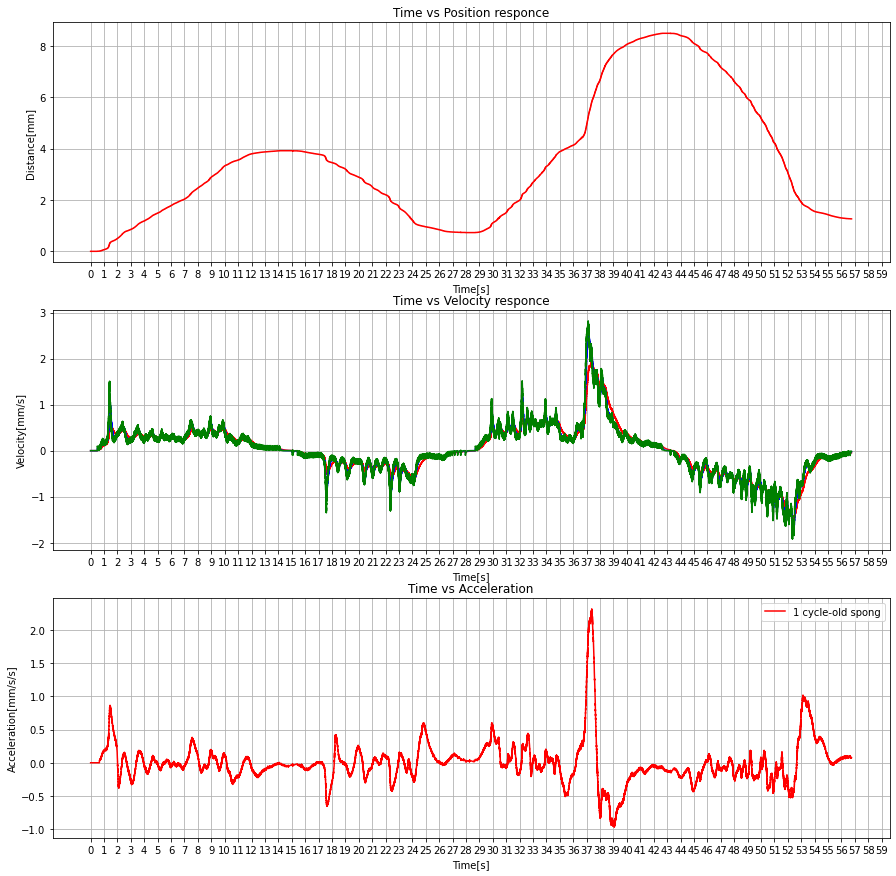

In [21]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, figsize=(15,15))

axs[0].set_xticks(range(0,60))
axs[0].set_xlabel('Time[s]')
axs[0].set_ylabel('Distance[mm]')
axs[0].grid()
axs[0].plot(features_matrix_1[:,0], features_matrix_1[:,3], c='r', label='1 cycle - old spong')
axs[0].set_title('Time vs Position responce')


axs[1].set_xticks(range(0,60))
axs[1].set_xlabel('Time[s]')
axs[1].set_ylabel('Velocity[mm/s]')
axs[1].grid()
axs[1].plot(features_matrix_1[:,0], features_matrix_1[:,4], c='r', label='g = 3 1 cycle - old spong')
axs[1].plot(features_matrix_1[:,0], features_matrix_1[:,5], c='b', label='g = 5 1 cycle - old spong')
axs[1].plot(features_matrix_1[:,0], features_matrix_1[:,6], c='g', label='g = 10 1 cycle - old spong')
axs[1].set_title('Time vs Velocity responce')

axs[2].set_xticks(range(0,60))
axs[2].set_xlabel('Time[s]')
axs[2].set_ylabel('Acceleration[mm/s/s]')
axs[2].grid()
axs[2].plot(features_matrix_1[:,0], features_matrix_1[:,7], c = 'r', label='1 cycle-old spong')
axs[2].set_title('Time vs Acceleration')

plt.legend()

# 5. Velocity calculation - Filter Method 
---
deferanciate 

$$
U_n ={\frac {V_{n} - V_{n-1}}{t_{n} - t_{n-1}}}
\tag{4}
$$


In [8]:
x = 0
for x in range (rows_input_data_matrix_1 - 1):
    time_deff = (features_matrix_1[x+1,0] - features_matrix_1[x,0])
    if time_deff!=0:
        features_matrix_1[x+1,8] = (features_matrix_1[x+1,3] - features_matrix_1[x,3])/ time_deff

## Save feature matrix as csv

In [9]:
import pandas as pd 
pd.DataFrame(features_matrix_1).to_csv("features_matrix_1.csv")